In [1]:
import pandas as pd
import numpy as np
import math
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import time
from datetime import date
from tqdm.notebook import tqdm as tqdm
from matplotlib import cm
import ast
from ipynb.fs.defs.functions import getName
from ipynb.fs.defs.functions import new_route

dft = pd.read_csv("../distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
dfd = pd.read_csv("../distanze/distances_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

num_orders = pd.read_csv("../distanze/num_orders.csv", delimiter=";", encoding = "ISO-8859-1")
orders_matrix = pd.read_csv("distribution/ord_numbers.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
orders = pd.read_csv("../distanze/request_cr.csv", delimiter=",", encoding = "ISO-8859-1")

159642

In [17]:
k = pd.read_csv("FrequencesResults/frequences.csv", encoding = "ISO-8859-1", index_col=0, header=0, squeeze = True)
week = ["lunedi", "martedi", "mercoledi", "giovedi", "venerdi", "sabato", "domenica"]
for d in week:
    k[d] = ast.literal_eval(k[d])

In [19]:
k

lunedi       [[Offanengo, Clavelli Martini, 5, Soncino, Dan...
martedi      [[Offanengo, Clavelli Martini, 5, Ripalta Crem...
mercoledi    [[Vescovato, Roma, 44, Soncino, Dante Alighier...
giovedi      [[Manerbio, INSURREZIONE NAZIONALE, Crema, Civ...
venerdi      [[Rivolta d'Adda, Stefano Renzi, 5, Bonemerse,...
sabato       [[Manerbio, INSURREZIONE NAZIONALE, Bonemerse,...
domenica     [[Offanengo, Clavelli Martini, 5, Vescovato, R...
Name: 0, dtype: object

In [60]:
def manage_exception(string):
    if(string.lower().strip() == 'piadena drizzona'):
        return 'Piadena, Platina, 40'
    elif(string.lower().strip() == 'brescia'):
        return 'manerbio, insurrezione nazionale'
    elif(string.lower().strip() == 'centro fumetto a. pazienza' or string.lower().strip() == 'cremona. la piccola biblioteca' or string.lower().strip() == 'uff. bib. cremona'):
        return 'cremona, ugolani dati, 4'
    elif(string.lower().strip() == 'casale cremasco vidolasco'):
        return 'Casale Cremasco-Vidolasco, Roma, 56'
    elif(string.lower().strip() == 'cremona-m.i.t.o.'):
        return 'Cremona, Palosca n. 2'
    elif(string.lower().strip() == 'cremona - manin (scolastica)'):
        return 'Cremona, Felice Cavallotti, 2'
    elif(string.lower().strip() == 'gadesco pieve delmona'):
        return 'Gadesco-Pieve Delmona, Giovanni Lonati 9'
    elif(string.lower().strip() == 'cremona - cda'):
        return 'cremona, sesto 39'
    elif(string.lower().strip() == 'crema'):
        return 'Crema, Civerchi, 9'
    elif(string.lower().strip() == 'martignana di po, libertà, 64'):
        return 'martignana di po, libertà, 64'
    else:
        return string

In [27]:
ords = orders[["data_richiesta", "biblioteca_partenza", "biblioteca_destinazione"]]
for i in tqdm(range(len(ords))):
    ords["data_richiesta"].iloc[i] = ords["data_richiesta"].iloc[i].split(" ")[0]
ords

C:\Users\Alberto\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,data_richiesta,biblioteca_partenza,biblioteca_destinazione
0,2016-01-01,RIVOLTA D'ADDA,BONEMERSE
1,2016-01-01,RIVOLTA D'ADDA,ROMANENGO
2,2016-01-01,RIVOLTA D'ADDA,Agnadello
3,2016-01-01,RIVOLTA D'ADDA,SPINO D'ADDA
4,2016-01-01,RIVOLTA D'ADDA,SPINO D'ADDA
...,...,...,...
159637,2018-10-22,RIVOLTA D'ADDA,BAGNOLO CREMASCO
159638,2018-12-20,BRESCIA,CREMA
159639,2018-11-07,PIANENGO,PANDINO
159640,2018-12-12,CASALMAGGIORE,BRESCIA


In [28]:
ords.to_csv("distribution/ords_by_date.csv", sep=";", encoding = "ISO-8859-1")

In [31]:
ords_aggregated = ords.groupby(by=["biblioteca_partenza", "data_richiesta"]).count()

In [54]:
ords_aggregated

biblioteca_destinazione
biblioteca_partenza data_richiesta                         
ANNICCO             2016-01-07                            1
                    2016-01-11                            3
                    2016-01-15                            1
                    2016-01-16                            1
                    2016-01-18                            1
...                                                     ...
VESCOVATO           2018-12-19                            1
                    2018-12-20                            4
                    2018-12-27                            1
                    2018-12-28                            3
                    2018-12-29                            2

[34466 rows x 1 columns]

In [65]:
to_be_removed_very_male = []
for i in tqdm(range(len(ords_aggregated))):
    try:
        getName(dft, manage_exception(ords_aggregated.iloc[i].name[0]))
    except:
        #ords_aggregated = ords_aggregated.drop(ords_aggregated.index[i])
        to_be_removed_very_male.append(ords_aggregated.index[i])


C:\Users\Alberto\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [66]:
for el in to_be_removed_very_male:
    ords_aggregated = ords_aggregated.drop(el)
ords_aggregated

biblioteca_destinazione
biblioteca_partenza data_richiesta                         
ANNICCO             2016-01-07                            1
                    2016-01-11                            3
                    2016-01-15                            1
                    2016-01-16                            1
                    2016-01-18                            1
...                                                     ...
VESCOVATO           2018-12-19                            1
                    2018-12-20                            4
                    2018-12-27                            1
                    2018-12-28                            3
                    2018-12-29                            2

[33677 rows x 1 columns]

In [67]:
ords_aggregated.to_csv("distribution/ords_by_date_filtered.csv", sep=";", encoding = "ISO-8859-1")

In [41]:
freq = pd.DataFrame(index=dft.columns, columns=["partenza", "destinazione"])
freq = freq.replace(np.nan, 0)
for i in tqdm(range(len(orders))):
    row = orders.iloc[i]
    try:
        if(getName(dft, manage_exception(row["biblioteca_destinazione"])) != getName(dft, manage_exception(row["biblioteca_partenza"]))):
            freq["destinazione"][getName(dft, manage_exception(row["biblioteca_destinazione"]))] += 1
            freq["partenza"][getName(dft, manage_exception(row["biblioteca_partenza"]))] += 1
    except:
        None

C:\Users\Alberto\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [61]:
freq.to_csv("distribution/biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

['Offanengo, Clavelli Martini, 5', 'Soncino, Dante Alighieri, 23', 'lunedi']

In [64]:
week = k.index
for i in tqdm(range(len(week))):
    day = week[i]
    lista = k[day]
    tmp = pd.DataFrame(index=dft.columns, columns=dft.columns).replace(np.nan, 0)
    for el in lista:
        partenza = el[0]
        destinazione = el[1]
        tmp.loc[partenza].loc[destinazione] += 1
    tmp.to_csv("distribution/"+day+"_biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

In [74]:
daily_d = pd.DataFrame(index=k.index, columns=["tot"]).replace(np.nan, 0)
for d in k.index:
    daily_d["tot"].loc[d] = len(k[d])

In [79]:
daily_d.to_csv("distribution/week_biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

## Charts

In [71]:
#Single biblio freq
s_b_f = pd.read_csv("distribution/ords_by_date_filtered.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
s_b_f

,data_richiesta,biblioteca_destinazione
ANNICCO,2016-01-07,1
ANNICCO,2016-01-11,3
ANNICCO,2016-01-15,1
ANNICCO,2016-01-16,1
ANNICCO,2016-01-18,1
...,...,...
VESCOVATO,2018-12-19,1
VESCOVATO,2018-12-20,4
VESCOVATO,2018-12-27,1
VESCOVATO,2018-12-28,3


In [75]:
s_b_f["biblioteca_destinazione"].values

array([1, 3, 1, ..., 1, 3, 2], dtype=int64)

In [94]:
x = []
y = []
for i in range(1,max(s_b_f["biblioteca_destinazione"])):
    c=list(s_b_f["biblioteca_destinazione"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)

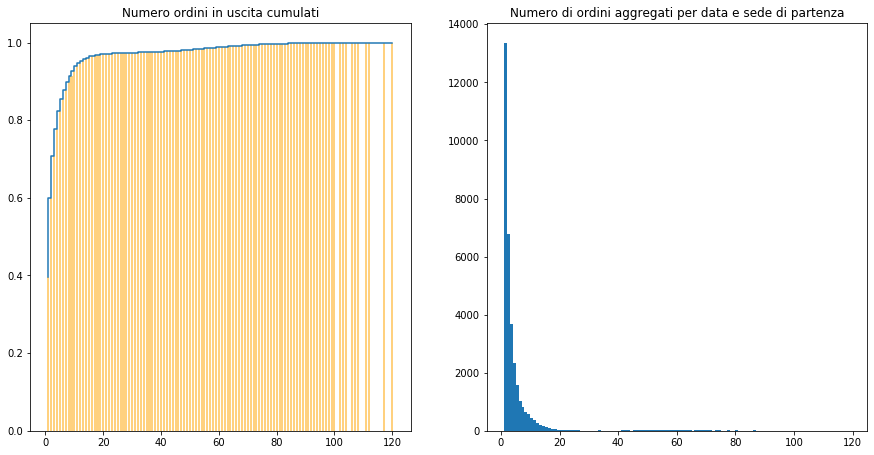

In [102]:
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[15,7.5])
plt.subplot(121)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.7, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.title("Numero ordini in uscita cumulati")

plt.subplot(122)
plt.hist(s_b_f["biblioteca_destinazione"].values, bins=range(1, 120, 1))
plt.title("Numero di ordini aggregati per data e sede di partenza")

plt.show()

In [109]:
tot = []
for d in k.index:
    tmp = pd.read_csv("distribution/"+d+"_biblio_freq.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
    for lt in tmp.values.tolist():
        tot += lt

In [110]:
tot_rz = [n for n in tot if n!=0]
x = []
y = []
for i in range(1,1000):
    c = list(tot_rz).count(i)
    if c>0:
        y.append(c)
        x.append(i)

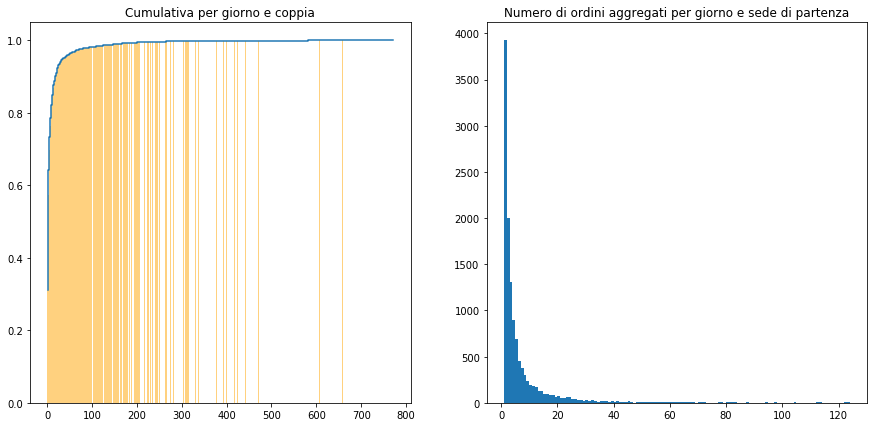

In [115]:
plt.figure(figsize=[15,7])
plt.subplot(121)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.title("Cumulativa per giorno e coppia")

plt.subplot(122)
plt.hist(tot_rz, bins=range(1, 125, 1))
plt.title("Numero di ordini aggregati per giorno e sede di partenza")

plt.show()

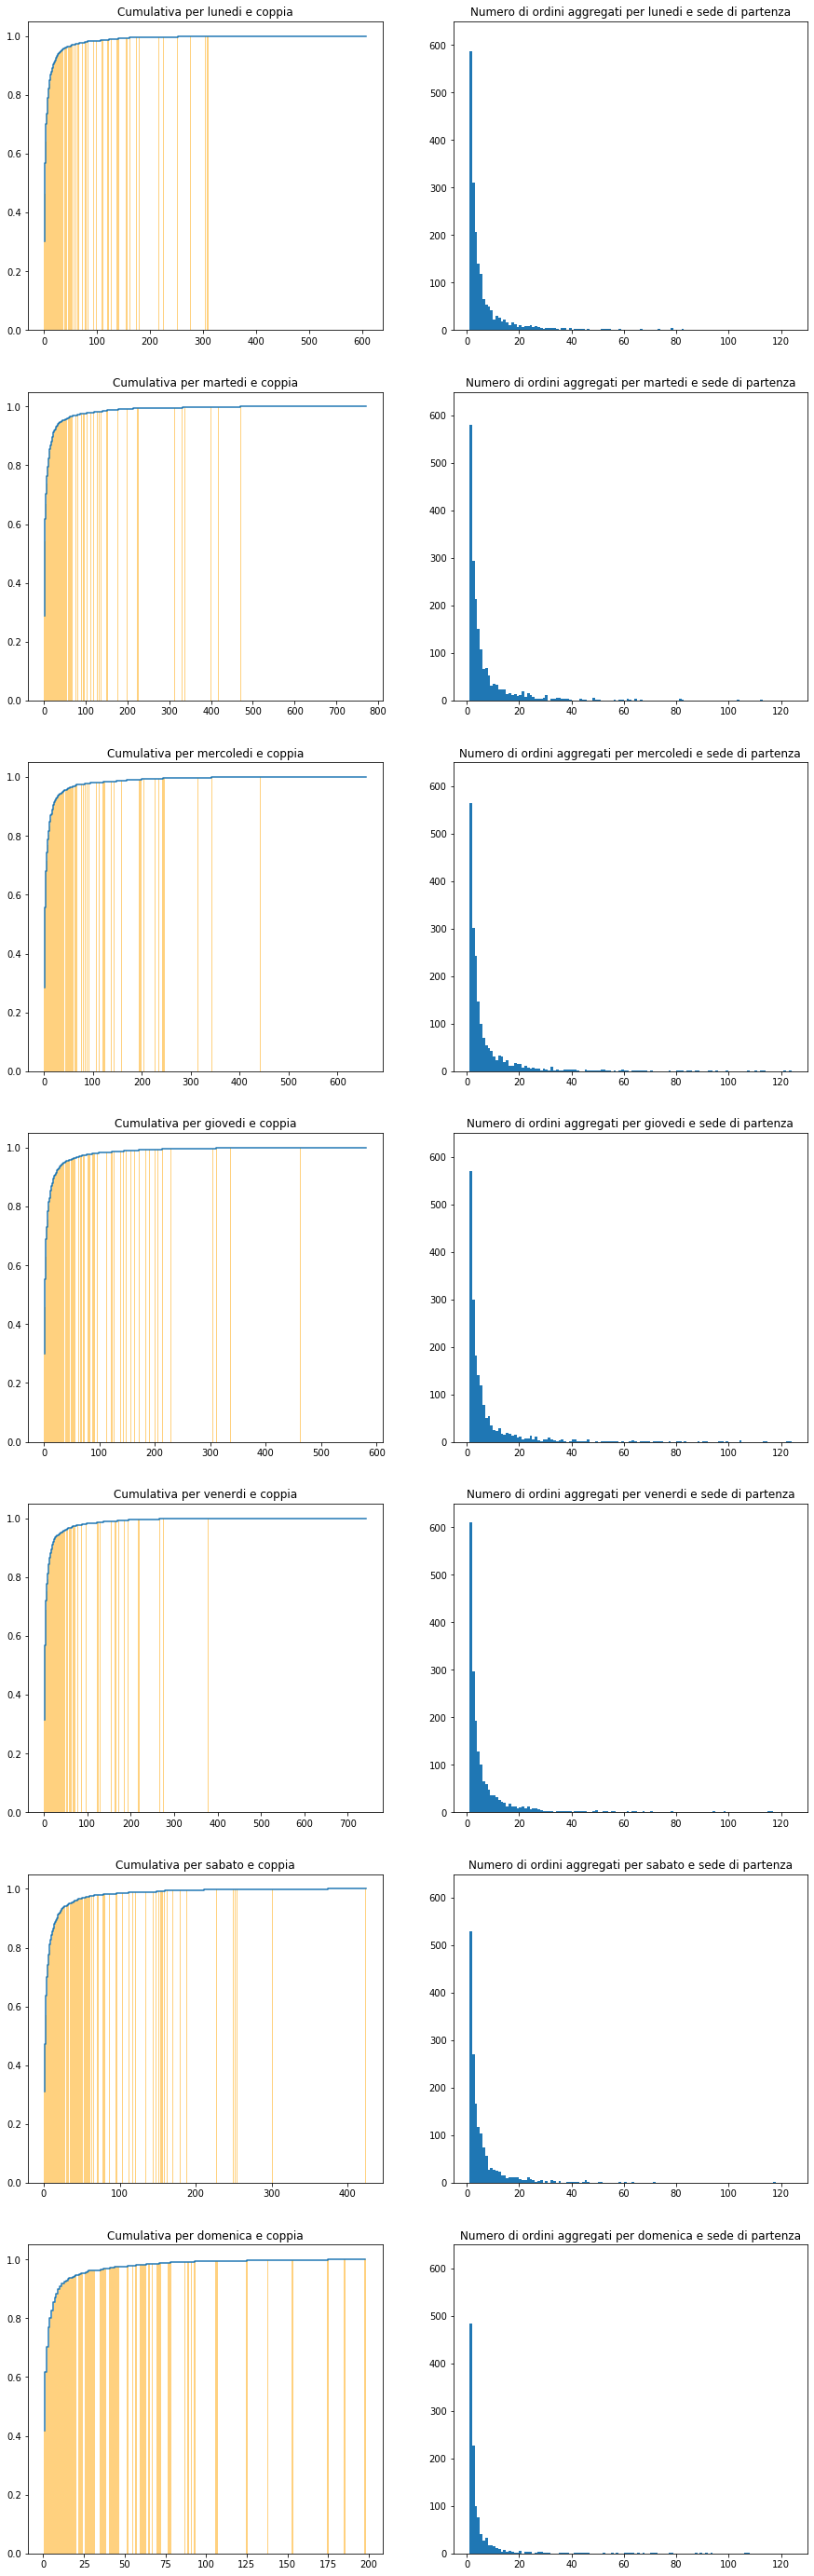

In [121]:
pos = 1
plt.figure(figsize=[15,50])
for d in k.index:
    tmp = pd.read_csv("distribution/"+d+"_biblio_freq.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
    tot = []
    
    for lt in tmp.values.tolist():
        tot += lt
        
    tot_rz = [n for n in tot if n!=0]
    
    x = []
    y = []
    for i in range(1,1000):
        c = list(tot_rz).count(i)
        if c>0:
            y.append(c)
            x.append(i)
    
    plt.subplot(7,2,pos)
    plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=1, color="orange", alpha=0.5)
    plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
    plt.title("Cumulativa per "+d+" e coppia")
    pos+=1
    plt.subplot(7,2,pos)
    plt.hist(tot_rz, bins=range(1, 125, 1))
    plt.ylim([0,650])
    plt.title("Numero di ordini aggregati per "+d+" e sede di partenza")
    pos += 1
plt.show()

In [122]:
tot = []
tmp = pd.read_csv("distribution/ord_numbers.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
for lt in tmp.values.tolist():
    tot += lt

In [123]:
tot_rz = [n for n in tot if n!=0]
x = []
y = []
for i in range(1,1000):
    c = list(tot_rz).count(i)
    if c>0:
        y.append(c)
        x.append(i)   

In [61]:
[n for n in tot_rz if n>1500]

[1582, 2540, 20176, 1566, 3958, 1723, 2533, 1936, 1965, 1641]

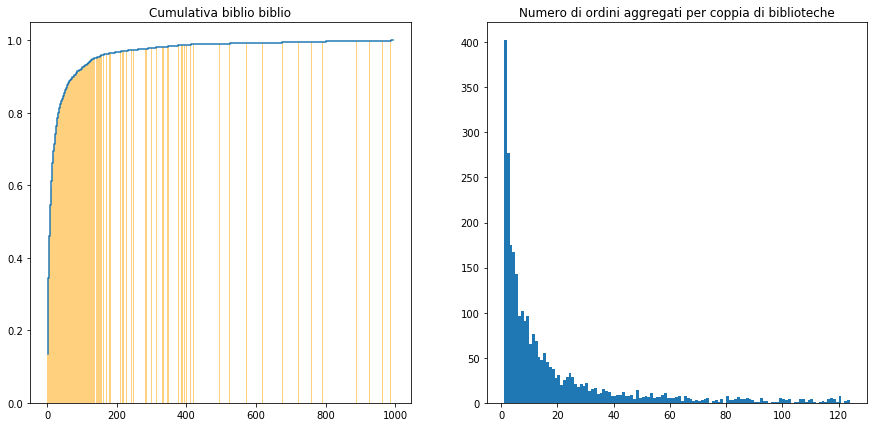

In [128]:
plt.figure(figsize=[15,7])
plt.subplot(121)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.title("Cumulativa biblio biblio")

plt.subplot(122)
plt.hist(tot_rz, bins=range(1, 125, 1))
plt.title("Numero di ordini aggregati per coppia di biblioteche")

plt.show()

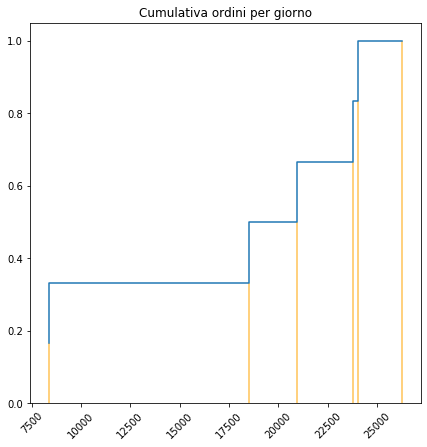

In [68]:
plt.figure(figsize=[7,7])
h = [len(x) for x in k]
x = []
y = []
for i in range(1,max(h)):
    c = list(h).count(i)
    if c>0:
        y.append(c)
        x.append(i)  
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=100, color="orange", alpha=0.5)

plt.xticks(rotation=45)
plt.title("Cumulativa ordini per giorno")

plt.show()

